## TD N°2 explicabilité du dataset Boston Housing

1) Charger le dataset bostong_housing
   1) Disponible dans le folder 04_interpretable_ml/td/data/
   
2) Nettoyer votre jeu de données pour créer une régression linéaire et un random forest
   1) Tester d'ajouter des features log, quadratique, ...

3)Créer un modèle baseline linéaire et random forest

4) Interpréter le modèle linéaire

5) Tuner votre random forest

6) Interpréter globalement votre modèle meilleur modèle RF 
   1) Utiliser les PDP ou ALE & Permutation feature Importance 
   2) Comparer les résulats du random forest avec votre interprétation du modèle linéaire

6) Réaliser une explicabilité par individu
   1) En utilisant la méthode ICE (PDP individuelle)
   2) LIME (Model local pour expliquer une prédiction)
   3) SHAP watterfall plot (Contribution marginale de chaque variable dans la prédiction)

7) Réaliser une explicabilité par individu sur le modèle RF
- 1) ICE, le PDP est-il une bonne représentation des variables importantes de votre modèle?
- 2) LIME
- 3) SHAP watterfall plot

8) Explorer les graphiques SHAP étudiés  dans la partie CM
   1) beeswarm (Contribution des variables)
   2) scatter (équivalent pdp)

## Contexte du Dataset

Le Boston Housing Dataset est un ensemble de données couramment utilisé en apprentissage automatique et en statistique pour étudier les relations entre diverses caractéristiques socio-économiques et immobilières dans la ville de Boston.  
Il contient des informations sur des propriétés résidentielles et leur environnement, et est souvent utilisé pour prédire la valeur des maisons, un problème classique de régression.

**Variable dispo**: 
- CRIM : taux de criminalité par habitant par ville
- ZN : proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés
- INDUS : proportion de terrains commerciaux non commerciaux par ville
- CHAS : variable binaire indiquant la proximité de la rivière Charles (= 1 si la zone délimitée par la ville touche la rivière ; 0 sinon)
- NOX : concentration des oxydes d'azote (en parties par 10 millions)
- RM : nombre moyen de pièces par logement
- AGE : proportion des unités occupées par leur propriétaire et construites avant 1940
- DIS : distances pondérées vers cinq centres d'emploi de Boston
- RAD : indice d'accessibilité aux autoroutes radiales
- TAX : taux d'imposition foncière par valeur totale pour chaque tranche de 10 000 dollars
- PTRATIO : ratio élèves-enseignants par ville
- LSTAT : pourcentage de la population de statut socio-économique inférieur
- MEDV : valeur médiane des maisons occupées par leur propriétaire (en milliers de dollars) - **variable cible**

In [1]:
#Web request
import requests
import io
import pandas as pd

### 1) Charger le dataset bostong_housing

In [2]:
#Télécharge directement depuis Github
url = "https://raw.githubusercontent.com/Roulitoo/cours_iae/master/04_INTERPRETABLE_ML/td/data/boston_housing.csv" 
download = requests.get(url).content

df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=';')

In [3]:
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,6.48,22.0


### 2)Nettoyer votre jeu de données pour créer une régression linéaire et un random forest

Penser à :

- Vérifier comment encoder vos variables qualitatives pour la modélisation 
- Analyser les distributions
- Analyser les outliers 
- Analyser les corrélations

>Tester d'ajouter des features log, quadratique, ...

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO  LSTAT  MEDV  
0     15.3   4.98  24.0  
1     17.8   9.14  21.6  
2     17.8   4.03  34.7  
3     18.7   2.94  33.4  
4     18.7   5.33  36.2  
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


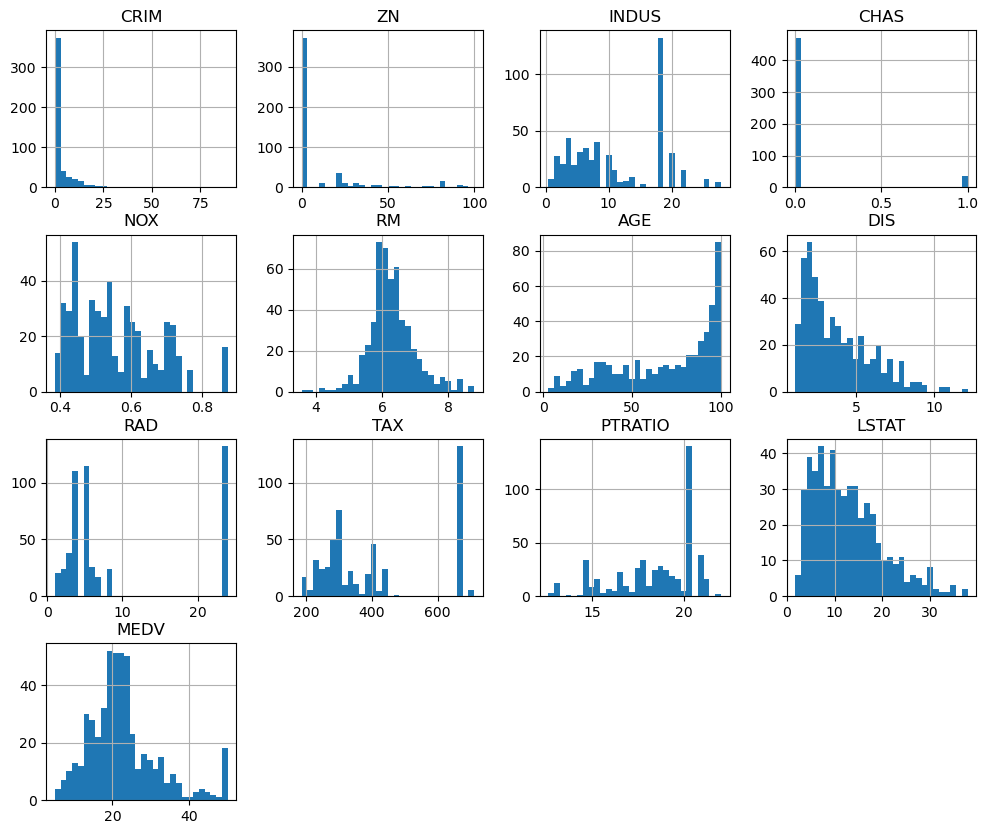

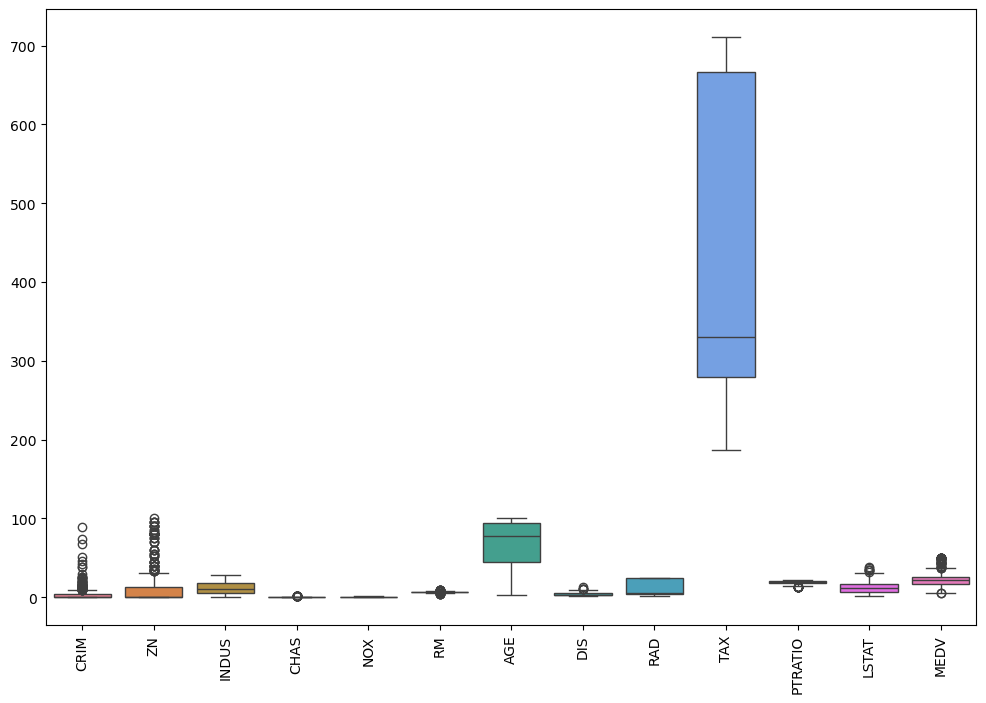

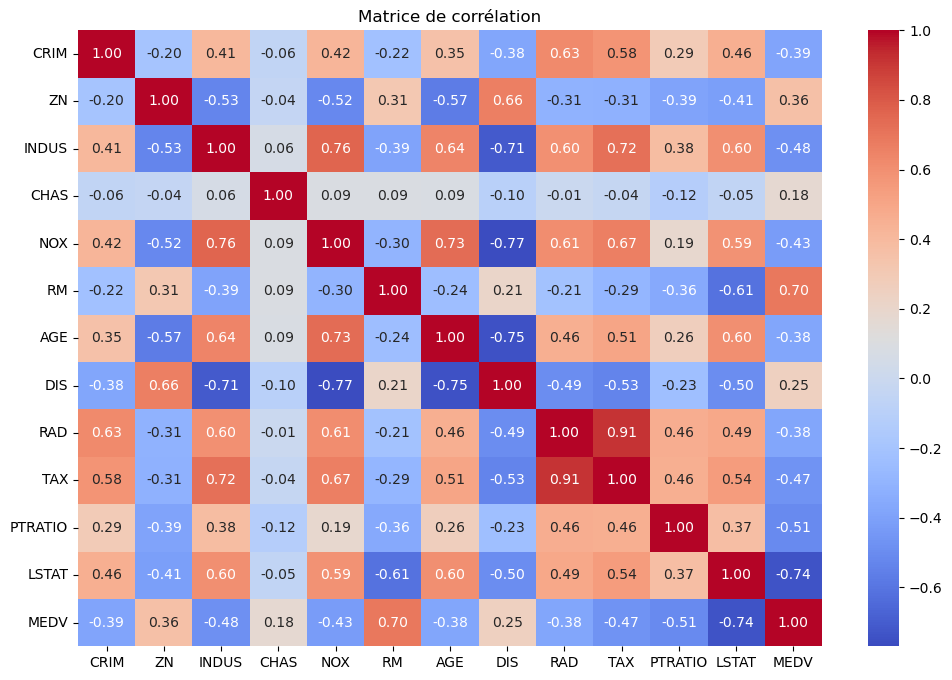


Régression Linéaire Performance:
R² Score: 0.8093
RMSE: 3.7394
MAE: 2.3327

Random Forest Performance:
R² Score: 0.8846
RMSE: 2.9086
MAE: 2.0323


In [4]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import requests
import io

# Charger le dataset
url = "https://raw.githubusercontent.com/Roulitoo/cours_iae/master/04_INTERPRETABLE_ML/td/data/boston_housing.csv"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=';')

# Suppression de la colonne inutile "Unnamed: 0"
df.drop(columns=['Unnamed: 0'], inplace=True)

# Affichage des premières lignes du dataset
print(df.head())

# Vérification des valeurs manquantes
print(df.isnull().sum())

# Analyse des distributions des variables
df.hist(figsize=(12, 10), bins=30)
plt.show()

# Détection des outliers avec Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Analyse des corrélations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

# Transformation logarithmique de certaines variables pour réduire l'effet des outliers
df['CRIM_log'] = np.log1p(df['CRIM'])  
df['DIS_log'] = np.log1p(df['DIS'])
df['LSTAT_log'] = np.log1p(df['LSTAT'])

# Ajout de termes quadratiques pour capturer des relations non linéaires
df['RM_squared'] = df['RM'] ** 2
df['LSTAT_squared'] = df['LSTAT'] ** 2

# Définition des variables indépendantes et de la variable cible
X = df.drop(columns=['MEDV', 'CRIM', 'DIS', 'LSTAT'])  # On enlève les versions non transformées
y = df['MEDV']

# Division en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation pour la régression linéaire
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modélisation : Régression Linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

# Modélisation : Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)  # Pas besoin de normaliser pour Random Forest
y_pred_rf = rf_reg.predict(X_test)

# Évaluation des modèles
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

# Résultats
evaluate_model(y_test, y_pred_lin, "Régression Linéaire")
evaluate_model(y_test, y_pred_rf, "Random Forest")


In [ ]:
Si on veut expliquer l'impact des variables, la régression linéaire est préférable.
Si on veut prédire avec précision, alors Random Forest est le meilleur choix.

### 3)Créer 2 modèles baseline, linéaire et random forest

In [5]:
# Entraînement de la Régression Linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Prédictions
y_pred_lin = lin_reg.predict(X_test_scaled)

# Évaluation du modèle
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
mae_lin = mean_absolute_error(y_test, y_pred_lin)

print(f"Régression Linéaire Performance:\nR² Score: {r2_lin:.4f}\nRMSE: {rmse_lin:.4f}\nMAE: {mae_lin:.4f}")


Régression Linéaire Performance:
R² Score: 0.8093
RMSE: 3.7394
MAE: 2.3327


In [6]:
# Entraînement du Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)  # Pas besoin de normalisation pour RF

# Prédictions
y_pred_rf = rf_reg.predict(X_test)

# Évaluation du modèle
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"\nRandom Forest Performance:\nR² Score: {r2_rf:.4f}\nRMSE: {rmse_rf:.4f}\nMAE: {mae_rf:.4f}")



Random Forest Performance:
R² Score: 0.8846
RMSE: 2.9086
MAE: 2.0323


### 4) Interpréter le modèle linéaire
Utiliser les méthodes intrinsèques du modèle pour l'interprétation

In [7]:
# Récupération des coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lin_reg.coef_
})

# Tri des variables par importance absolue
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False).drop(columns=['Abs_Coefficient'])

# Affichage des coefficients
print("Coefficients de la Régression Linéaire :")
print(coefficients)


📌 Coefficients de la Régression Linéaire :
          Feature  Coefficient
12     RM_squared    16.735162
4              RM   -14.487983
11      LSTAT_log    -5.468389
6             RAD     3.434073
9        CRIM_log    -3.082674
10        DIS_log    -2.867622
3             NOX    -1.827562
7             TAX    -1.740341
8         PTRATIO    -1.688107
2            CHAS     0.565945
13  LSTAT_squared     0.476753
1           INDUS     0.253835
5             AGE     0.247925
0              ZN     0.108021


C:\Users\lucas\AppData\Local\Temp\ipykernel_12696\2335608046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=coefficients['Feature'], x=coefficients['Coefficient'], palette="coolwarm")


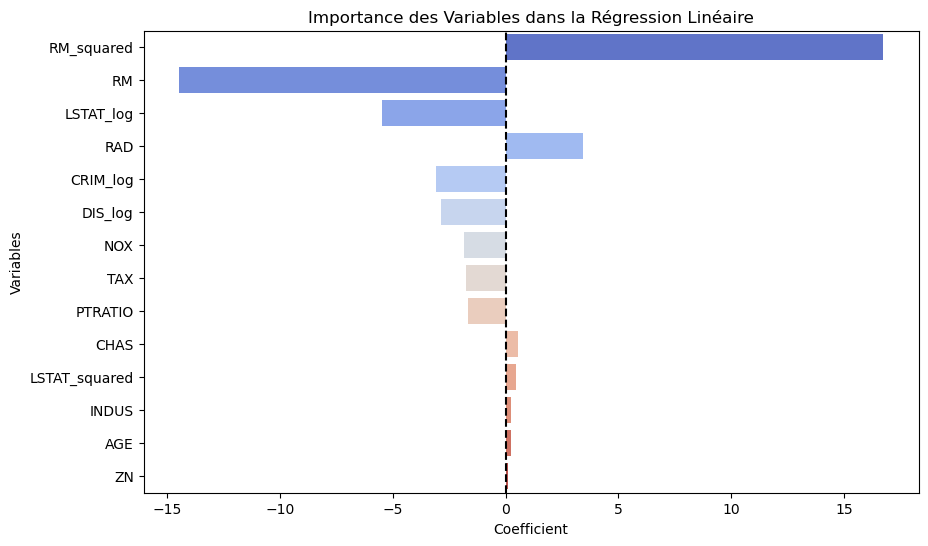

In [8]:
# Affichage graphique des coefficients
plt.figure(figsize=(10, 6))
sns.barplot(y=coefficients['Feature'], x=coefficients['Coefficient'], palette="coolwarm")
plt.axvline(x=0, color='black', linestyle='--')
plt.title("Importance des Variables dans la Régression Linéaire")
plt.xlabel("Coefficient")
plt.ylabel("Variables")
plt.show()


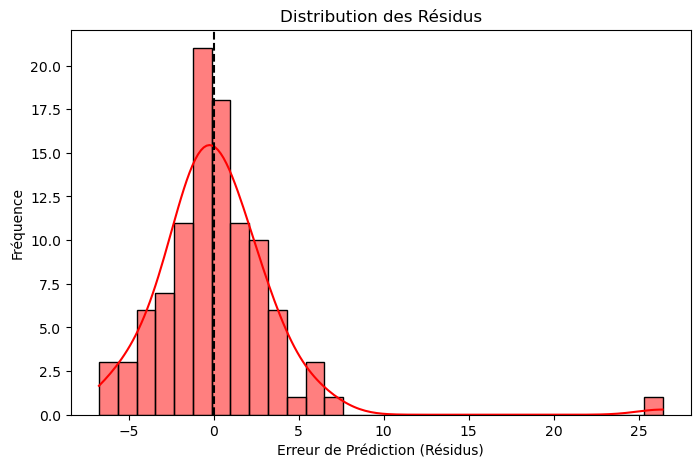

In [9]:
# Calcul des résidus
residuals = y_test - y_pred_lin

# Distribution des résidus
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color="red")
plt.axvline(x=0, color='black', linestyle='--')
plt.title("Distribution des Résidus")
plt.xlabel("Erreur de Prédiction (Résidus)")
plt.ylabel("Fréquence")
plt.show()


In [ ]:
Le modèle linéaire montre l'importance de certaines variables comme le nombre de pièces (RM), le statut socio-économique (LSTAT), et la criminalité (CRIM), mais des relations non linéaires et d'interactions entre variables pourraient être mieux capturées par des modèles plus complexes, comme le Random Forest.

### 5) Tuner votre random forest

In [10]:
from sklearn.model_selection import GridSearchCV

# Définir la grille de paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],    # Nombre minimum d'échantillons dans une feuille
    'bootstrap': [True, False]        # Utilisation ou non du bootstrap
}

# Créer un modèle Random Forest
rf = RandomForestRegressor(random_state=42)

# Création de l'objet GridSearchCV avec validation croisée
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entraînement du modèle avec la recherche sur grille
grid_search.fit(X_train, y_train)

# Résultats de la recherche sur grille
print(f"\nMeilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleur score (Négatif de l'erreur quadratique moyenne) : {grid_search.best_score_}")

# Prédictions avec le modèle optimal
y_pred_rf_optimal = grid_search.best_estimator_.predict(X_test)

# Évaluation du modèle avec les meilleurs paramètres
r2_rf_optimal = r2_score(y_test, y_pred_rf_optimal)
rmse_rf_optimal = np.sqrt(mean_squared_error(y_test, y_pred_rf_optimal))
mae_rf_optimal = mean_absolute_error(y_test, y_pred_rf_optimal)

print(f"\nPerformance du Random Forest Optimisé :")
print(f"R² Score: {r2_rf_optimal:.4f}")
print(f"RMSE: {rmse_rf_optimal:.4f}")
print(f"MAE: {mae_rf_optimal:.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Meilleurs paramètres : {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Meilleur score (Négatif de l'erreur quadratique moyenne) : -14.784984716290705

Performance du Random Forest Optimisé :
R² Score: 0.8772
RMSE: 3.0004
MAE: 2.0555


In [ ]:
Après optimisation du modèle Random Forest, voici les résultats clés :

Meilleurs paramètres :
bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100.
Performance optimisée :
R² Score : 0.8772 (meilleure capacité à expliquer la variance des données)
RMSE : 3.0004 (réduction de l'erreur quadratique par rapport au modèle initial)
MAE : 2.0555 (réduction de l'erreur absolue moyenne)
En résumé, l'optimisation a permis d'améliorer la précision des prédictions du modèle, avec une meilleure capacité à expliquer les données et des erreurs plus faibles.

### 6) Interpréter globalement votre modèle meilleur modèle RF 
   1) Utiliser les PDP ou ALE & Permutation feature Importance 
   2) Comparer les résulats du random forest avec votre interprétation du modèle linéaire

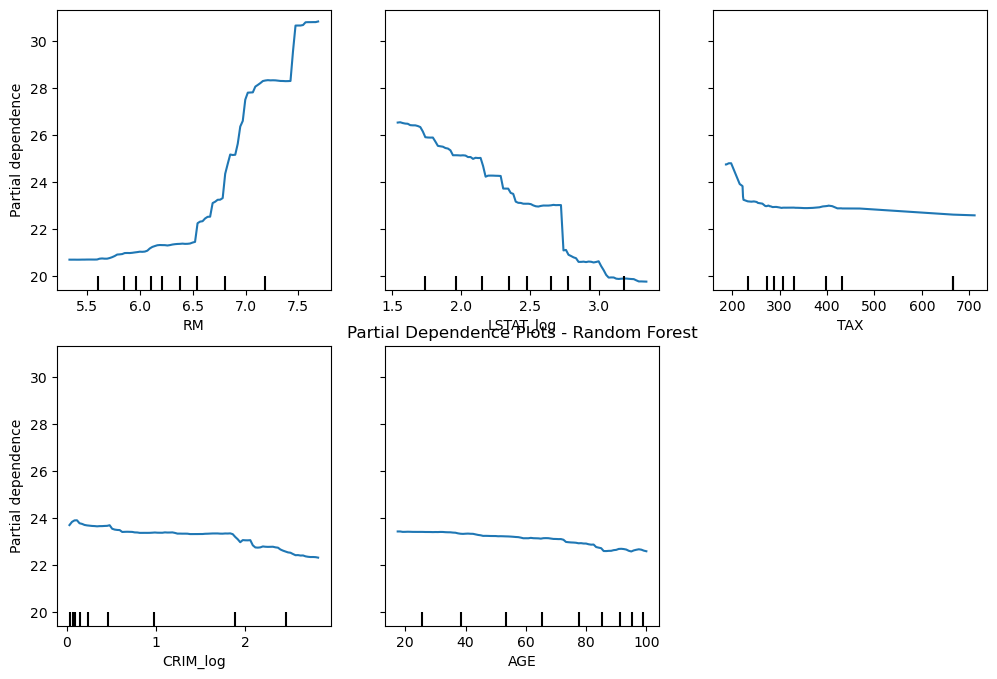

In [11]:
from sklearn.inspection import PartialDependenceDisplay


# Liste des variables à utiliser dans les PDP (transformées si nécessaire)
features_to_plot = ['RM', 'LSTAT_log', 'TAX', 'CRIM_log', 'AGE']

# Affichage des PDP pour les variables les plus importantes
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=features_to_plot, feature_names=X.columns, ax=ax)
plt.title("Partial Dependence Plots - Random Forest")
plt.show()



C:\Users\lucas\anaconda3\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor wa

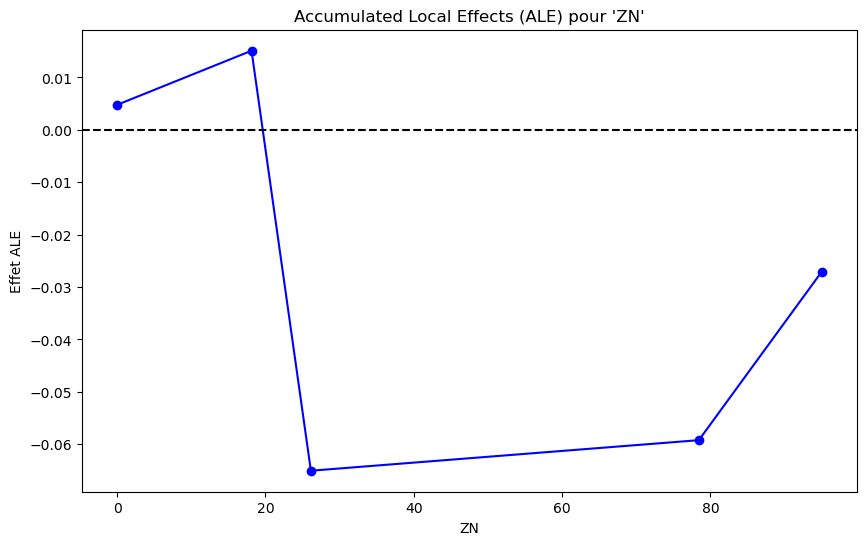

In [21]:
from alibi.explainers import ALE
import matplotlib.pyplot as plt

# Définition de l'explainer ALE (passer rf_reg.predict comme fonction)
ale_explainer = ALE(rf_reg.predict, feature_names=X.columns)

# Calcul des effets ALE sur l'ensemble de test
ale_exp = ale_explainer.explain(X_test.values)

# Affichage des effets ALE pour 'ZN' (index 0)
zn_idx = list(X.columns).index('ZN')  # Trouver l'index de 'ZN'
ale_values = ale_exp.ale_values[zn_idx]
feature_values = ale_exp.feature_values[zn_idx]

# Visualisation de l'effet ALE pour 'ZN'
plt.figure(figsize=(10, 6))
plt.plot(feature_values, ale_values, marker='o', linestyle='-', color='b')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("ZN")
plt.ylabel("Effet ALE")
plt.title("Accumulated Local Effects (ALE) pour 'ZN'")
plt.show()


C:\Users\lucas\AppData\Local\Temp\ipykernel_12696\1642387436.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_df, palette="coolwarm")


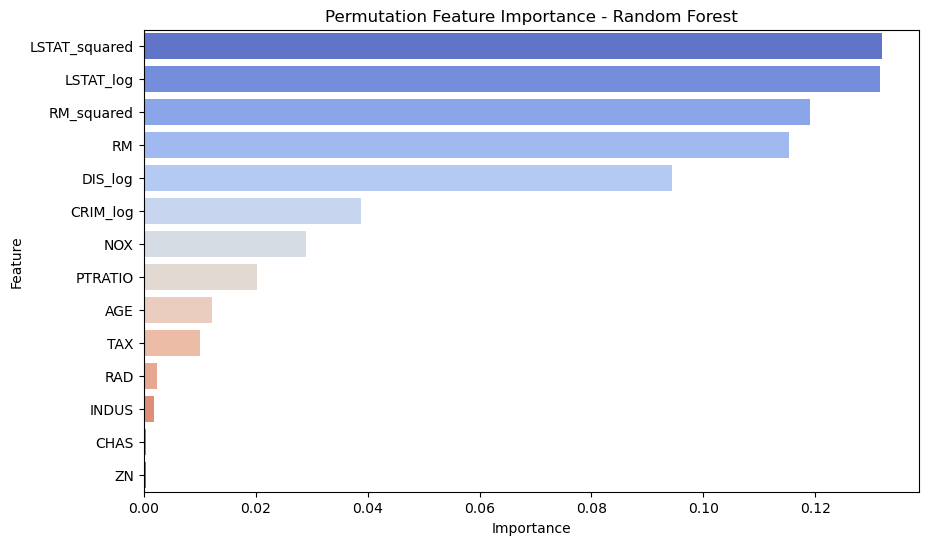

In [13]:
from sklearn.inspection import permutation_importance

# Calcul de l'importance des variables via permutation
perm_importance = permutation_importance(rf_reg, X_test, y_test, n_repeats=10, random_state=42)

# Affichage de l'importance des caractéristiques
perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Affichage des résultats
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_df, palette="coolwarm")
plt.title("Permutation Feature Importance - Random Forest")
plt.show()


In [ ]:
Les graphiques et techniques comme les PDP, ALE et l'importance des variables par permutation nous aident à mieux comprendre comment les différentes caractéristiques influencent la prédiction du modèle RF. Par rapport au modèle linéaire, le RF peut capturer des relations plus complexes, notamment les effets non linéaires et les interactions entre variables.

### 7) Réaliser une explicabilité par individu sur le modèle RF
- 1) ICE, le PDP est-il une bonne représentation des variables importantes de votre modèle?
- 2) LIME
- 3) SHAP watterfall plot

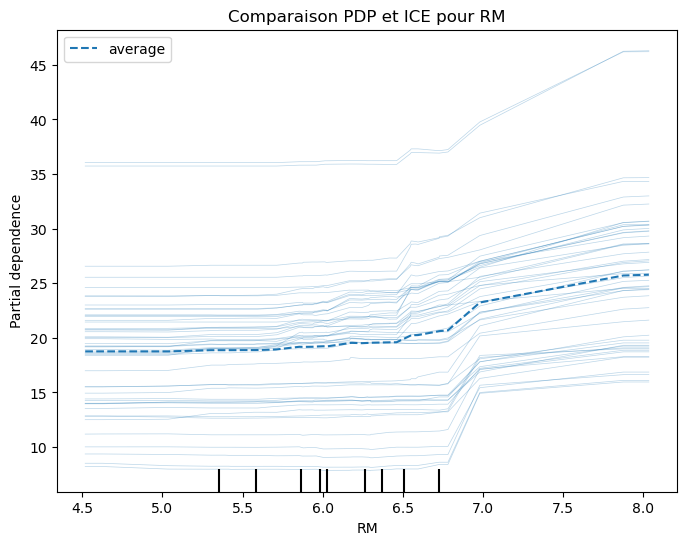

In [22]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import numpy as np

# Sélection d'un échantillon aléatoire de 50 individus pour éviter trop de courbes
subset = X_test.sample(50, random_state=42)

# ICE pour la variable RM (nombre de pièces)
fig, ax = plt.subplots(figsize=(8,6))
PartialDependenceDisplay.from_estimator(rf_reg, subset, ['RM'], kind='both', ax=ax)
plt.title("Comparaison PDP et ICE pour RM")
plt.show()


In [23]:
import lime
import lime.lime_tabular

# Initialisation de LIME
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, 
                                                   feature_names=X.columns,
                                                   mode='regression')

# Explication pour un individu (ex: première instance de X_test)
idx = 0  # Modifier pour tester d'autres individus
lime_exp = explainer.explain_instance(X_test.iloc[idx].values, rf_reg.predict)

# Affichage des résultats
lime_exp.show_in_notebook()


C:\Users\lucas\anaconda3\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


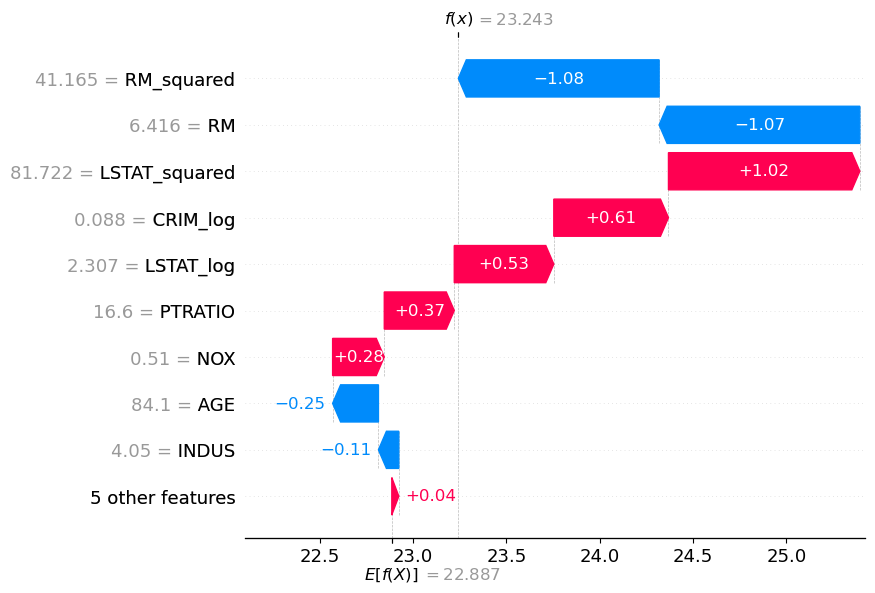

In [27]:
import shap

# Initialisation de l'explainer SHAP pour le modèle RF
explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(X_test)

# Sélection d'un individu pour analyse
idx = 0  # Modifier pour voir d'autres individus
shap.initjs()
shap.waterfall_plot(shap.Explanation(values=shap_values[idx], base_values=explainer.expected_value, data=X_test.iloc[idx]))


In [ ]:
Le PDP donne une vue globale mais simplifie trop la réalité.
ICE est plus précis pour voir les variations individuelles.
LIME donne une explication locale mais simplifiée.
SHAP est la méthode la plus robuste et précise pour comprendre l'impact de chaque variable sur une prédiction spécifique.
SHAP Waterfall est le plus recommandé pour comprendre une prédiction individuelle !

### 8) Explorer les graphiques SHAP étudiés  dans la partie CM
   1) beeswarm (Contribution des variables)
   2) scatter (équivalent pdp)

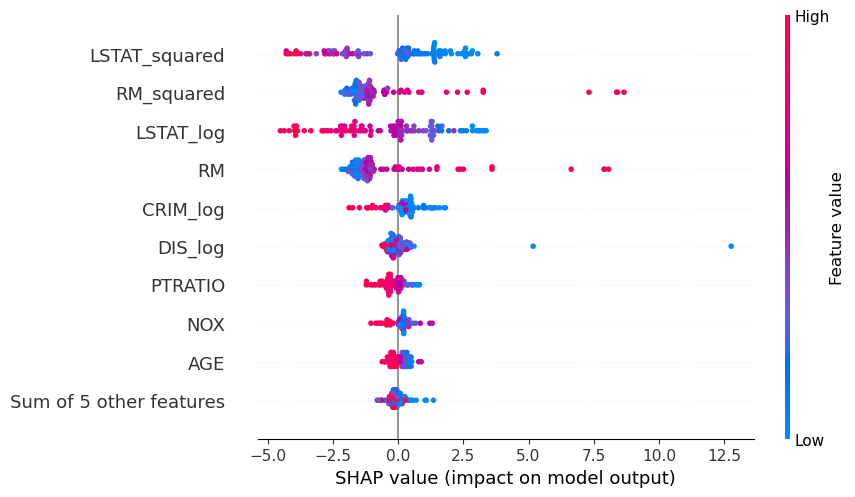

In [42]:
import shap

# Créer un objet shap.Explanation
explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(X_test)

# Créer l'objet Explanation si nécessaire
shap_explanation = shap.Explanation(values=shap_values, data=X_test, feature_names=X_test.columns)

# Graphique beeswarm
shap.plots.beeswarm(shap_explanation)

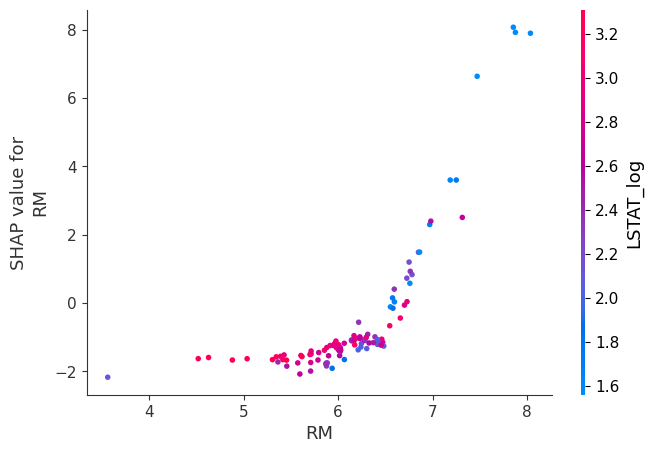

In [43]:
# Sélection d’une variable clé (ex: RM)
shap.dependence_plot("RM", shap_values, X_test)


In [ ]:
Beeswarm plot nous aide à comprendre l'importance globale de chaque variable et comment elles influencent globalement les prédictions.
Dependence plot nous aide à voir la relation localisée de chaque variable avec la prédiction, tout en tenant compte des interactions entre variables.
Les deux graphiques sont des outils puissants pour explorer et expliquer les prédictions d'un modèle, mais chacun met en lumière des aspects différents de l'explicabilité du modèle.